# NLP (Natural Language Processing)
- NLP is a branch of Artificial Intelligence that enables computers to understand, interpret, and generate human language.
- Teaching computers to understand and work with human language.

#### Uses of NLP :
- Chatbots & Virtual Assistants – like ChatGPT, Siri, Alexa.
- Sentiment Analysis – understanding emotions in reviews or social media.
- Machine Translation – translating languages (e.g., Google Translate).
- Spam Detection – filtering unwanted emails or messages.
- Speech Recognition – converting voice into text.
- Text Summarization – creating short summaries from long documents.
- Search Engines – improving search accuracy and relevance.
- Text Classification – categorizing documents (news, emails, topics).

In [1]:
# Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset

data_path = r"C:\Users\DELL\Assighnments\amazonreviews.tsv"
data = pd.read_csv(data_path, sep="\t")
data.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [3]:
# Basic Cleaning text

data.drop_duplicates(subset=('review'), inplace=True)
data.dropna(subset=('review'), inplace=True)
data.reset_index(drop=True, inplace=True)

data.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
# Sentiment Distribution [Checks class Imbalnce]
data['label'].value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

In [5]:
# Converting labels [neg=0, pos=1]

data['true_label'] = data['label'].map({'neg':0, 'pos':1})
data.head()

,label,review,true_label
0,pos,Stuning even for the non-gamer: This sound tra...,1
1,pos,The best soundtrack ever to anything.: I'm rea...,1
2,pos,Amazing!: This soundtrack is my favorite music...,1
3,pos,Excellent Soundtrack: I truly like this soundt...,1
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",1


In [6]:
# Text Processing
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]","",text)
    return " ".join(w for w in text.split() if w not in stop_words)

data['clean_review'] = data['review'].apply(clean_text)
data.head()

,label,review,true_label,clean_review
0,pos,Stuning even for the non-gamer: This sound tra...,1,stuning even nongamer sound track beautiful pa...
1,pos,The best soundtrack ever to anything.: I'm rea...,1,best soundtrack ever anything im reading lot r...
2,pos,Amazing!: This soundtrack is my favorite music...,1,amazing soundtrack favorite music time hands i...
3,pos,Excellent Soundtrack: I truly like this soundt...,1,excellent soundtrack truly like soundtrack enj...
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",1,remember pull jaw floor hearing youve played g...


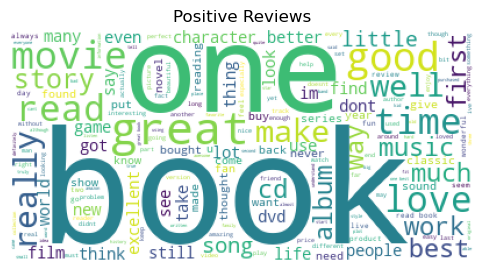

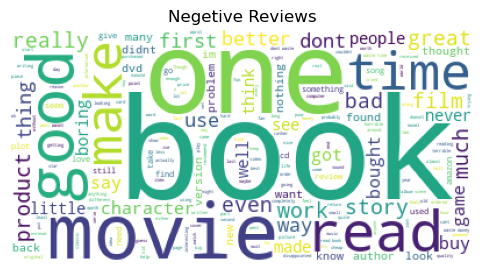

In [7]:
# visualizations for Positive & Negetive with using WordCloud

from wordcloud import WordCloud

Positive_text = " ".join(data[data['label'] == 'pos']['clean_review'])
Negetive_text = " ".join(data[data['label'] == 'neg']['clean_review'])

#Positive:
plt.figure(figsize=(6,4))
plt.imshow(WordCloud(background_color='white').generate(Positive_text))
plt.axis('off')
plt.title('Positive Reviews')
plt.show()
#Negetive:
plt.figure(figsize=(6,4))
plt.imshow(WordCloud(background_color='white').generate(Negetive_text))
plt.axis('off')
plt.title('Negetive Reviews')
plt.show()

## Rule-Based Sentiment Analyzer
- Apply VADER
- VADER (SentimentIntensityAnalyzer) is rule-based, not ML-based.
- It relies on things that cleaning often removes.
- VADER score:

Original → very positive

Cleaned → mild positive

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return SIA.polarity_scores(str(text))['compound']
def get_vader_prediction(score):
    return 1 if score >=0 else 0

data['vader_score'] = data['review'].apply(get_vader_score)
data['vader_pred'] = data['vader_score'].apply(get_vader_prediction)

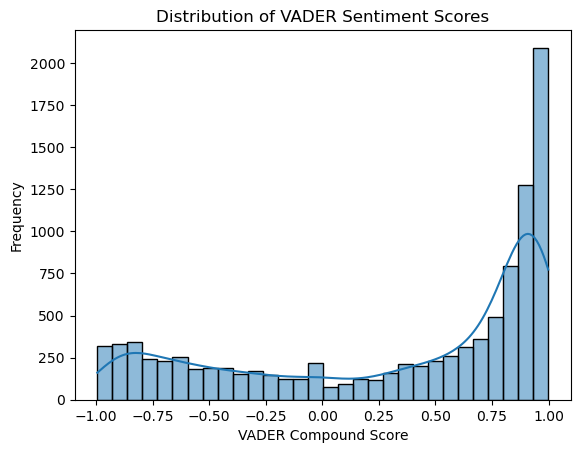

In [9]:
# Distribution of VADER Sentiment Scores
import seaborn as sns
sns.histplot(data['vader_score'],kde=True ,bins=30)
plt.title("Distribution of VADER Sentiment Scores")
plt.xlabel("VADER Compound Score")
plt.ylabel("Frequency")
plt.show()

In [10]:
data['vader_pred'].value_counts()

vader_pred
1    6935
0    3065
Name: count, dtype: int64

In [11]:
data.head()

,label,review,true_label,clean_review,vader_score,vader_pred
0,pos,Stuning even for the non-gamer: This sound tra...,1,stuning even nongamer sound track beautiful pa...,0.9454,1
1,pos,The best soundtrack ever to anything.: I'm rea...,1,best soundtrack ever anything im reading lot r...,0.8957,1
2,pos,Amazing!: This soundtrack is my favorite music...,1,amazing soundtrack favorite music time hands i...,0.9858,1
3,pos,Excellent Soundtrack: I truly like this soundt...,1,excellent soundtrack truly like soundtrack enj...,0.9814,1
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",1,remember pull jaw floor hearing youve played g...,0.9781,1


In [12]:
# Metrics Evaluation

def eval_metrics(y,y_pred):
    from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

    print('F1_score :',f1_score(y,y_pred))
    print('Prec_Score :',precision_score(y,y_pred))
    print('Recall_Score :',recall_score(y,y_pred))
    print('Accurcay_Score :',accuracy_score(y,y_pred))

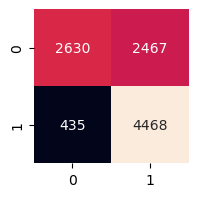

              precision    recall  f1-score   support

           0       0.86      0.52      0.64      5097
           1       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000

F1_score : 0.7548572393985471
Prec_Score : 0.6442682047584716
Recall_Score : 0.9112788088925148
Accurcay_Score : 0.7098


In [13]:
# Evaluation the Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cm = confusion_matrix(data['true_label'], data['vader_pred'])
acc_score = accuracy_score(data['true_label'], data['vader_pred'])
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()
print(classification_report(data['true_label'], data['vader_pred']))
eval_metrics(data['true_label'], data['vader_pred'])

In [14]:
# wrong predictions
errors = data[data["true_label"] != data["vader_pred"]]
errors[["review", "true_label", "vader_score"]].head(10)


,review,true_label,vader_score
13,Oh please: I guess you have to be a romance no...,0,0.9097
19,sizes recomended in the size chart are not rea...,0,0.4926
20,mens ultrasheer: This model may be ok for sede...,0,0.6318
22,Another Abysmal Digital Copy: Rather than scra...,0,0.9667
28,Oh dear: I was excited to find a book ostensib...,0,0.6486
34,Nothing you don't already know: If you have ev...,0,0.4434
35,Unfortunately it wasn't entertaining in the le...,0,0.8513
38,Doesn't work on a Mac: It clearly says on line...,0,0.5951
39,Very Frustrating: My three year old son was ve...,0,0.0892
40,Mind numbing: This game makes you do the same ...,0,0.6177


## MACHINE LEARNING (TF-IDF + LOGISTIC REGRESSION)

In [15]:
# Deviding Features
X = data['clean_review']
y = data['true_label']

In [16]:
y.value_counts()

true_label
0    5097
1    4903
Name: count, dtype: int64

In [17]:
# Feature extraction for multi labels
from sklearn.feature_extraction.text import TfidfVectorizer
X_tfidf = TfidfVectorizer().fit_transform(X)

In [18]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,
                                                test_size=0.2,
                                                random_state=42,
                                                stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 38702), (2000, 38702), (8000,), (2000,))

In [19]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)

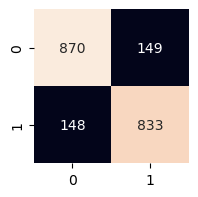

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1019
           1       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

F1_score : 0.8487009679062659
Prec_Score : 0.8482688391038696
Recall_Score : 0.8491335372069317
Accurcay_Score : 0.8515


In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()


print(classification_report(y_test, y_pred))
eval_metrics(y_test, y_pred)

### DEEP LEARNING (BERT)

In [22]:
from transformers import pipeline

In [23]:
bert_model = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f.
Using a pipeline without specifying a model name and revision in production is not recommended.


Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

In [24]:
sample_data = data.sample(500, random_state=42).reset_index(drop=True)

bert_results = []

for text in sample_data['review']:
    result = bert_model(text)
    bert_results.append(result[0])

bert_data = pd.DataFrame(bert_results)


In [25]:
bert_data.head()

,label,score
0,NEGATIVE,0.999001
1,NEGATIVE,0.999205
2,POSITIVE,0.975797
3,NEGATIVE,0.997771
4,POSITIVE,0.996524


In [26]:
bert_data["bert_pred"] = 0   # default

bert_data.loc[bert_data["label"] == "POSITIVE", "bert_pred"] = 1


In [27]:
sample_data["bert_pred"] = bert_data["bert_pred"]
sample_data["bert_confidence"] = bert_data["score"]


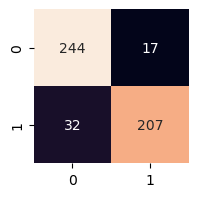

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       261
           1       0.92      0.87      0.89       239

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

F1_score : 0.8941684665226782
Prec_Score : 0.9241071428571429
Recall_Score : 0.8661087866108786
Accurcay_Score : 0.902


In [28]:
# Evaluation Metrics

cm = confusion_matrix(sample_data['true_label'], sample_data['bert_pred'])
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()


print(classification_report(sample_data['true_label'], sample_data['bert_pred']))
eval_metrics(sample_data['true_label'], sample_data['bert_pred'])

## Final Comparison

In [29]:
comparison = pd.DataFrame({'Model':['Vader','ML_logistic','Deep Learning'],
                          'Scores':[eval_metrics(data['true_label'], data['vader_pred']),
                                   eval_metrics(y_test, y_pred),
                                   eval_metrics(sample_data['true_label'], sample_data['bert_pred'])]})

F1_score : 0.7548572393985471
Prec_Score : 0.6442682047584716
Recall_Score : 0.9112788088925148
Accurcay_Score : 0.7098
F1_score : 0.8487009679062659
Prec_Score : 0.8482688391038696
Recall_Score : 0.8491335372069317
Accurcay_Score : 0.8515
F1_score : 0.8941684665226782
Prec_Score : 0.9241071428571429
Recall_Score : 0.8661087866108786
Accurcay_Score : 0.902


In [30]:
comparison = pd.DataFrame({
    "Model": ["VADER", "Logistic Regression", "BERT"],
    "Accuracy": [0.71, 0.85, 0.90],
    "Precision": [0.64, 0.85, 0.92],
    "Recall": [0.91, 0.85, 0.87],
    "F1-Score": [0.75, 0.85, 0.89]
})

comparison

,Model,Accuracy,Precision,Recall,F1-Score
0,VADER,0.71,0.64,0.91,0.75
1,Logistic Regression,0.85,0.85,0.85,0.85
2,BERT,0.90,0.92,0.87,0.89


## Conclusion :
BERT is the best model because it achieves the highest accuracy (0.90) and F1-score (0.89)